# Title of project :  **IRIS_CLASSIFICATION**

# **1. Overview of Problem Statement:**
 The goal is to classify iris flowers into one of three species based on four features: sepal length, sepal width, petal length, and petal width

# **2. Dataset Preparation:**
* **Dataset**: The Iris dataset is available in the UCI Machine Learning
  Repository and is also included in many machine learning libraries, such as
  scikit-learn.


---


* **Features**: Sepal length, sepal width,
petal length, petal width.


---


* **Labels**: Iris species (Setosa, Versicolour, Virginica).

In [43]:
#Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [45]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [46]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


# **Dataset Rows & Columns count**

In [47]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


# **Data Exploration and Visualization**

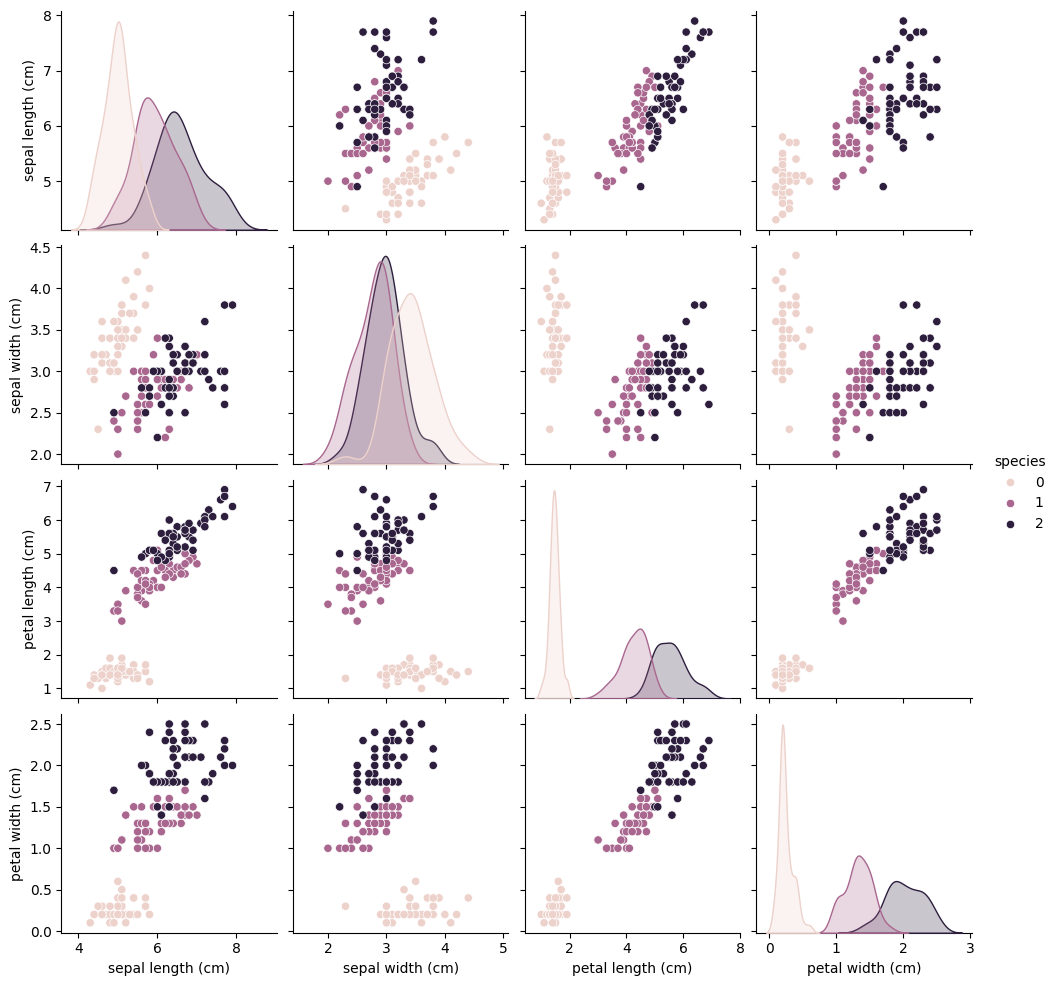

In [48]:
sns.pairplot(df, hue='species') #helps to see class separation or overlap between groups.
plt.show()

In [58]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,149.00,149.00,149.00,149.00,149.00
mean,5.84,3.06,3.75,1.19,0.99
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.30,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


# **Data Preprocessing**

In [49]:
#check info of dataset so they all are numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [50]:
#dataset duplicate
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')
df = df.drop_duplicates() #drop duplicates
# Verify duplicates are removed
dup_after = df.duplicated().sum()
print(f'Duplicates after removal: {dup_after}')

number of duplicated rows are 1
Duplicates after removal: 0


In [51]:
#Check If there is any Null Value present in Dataset in percentage
round(df.isnull().sum()/df.shape[0]*100,2)

,0
sepal length (cm),0.0
sepal width (cm),0.0
petal length (cm),0.0
petal width (cm),0.0
species,0.0


since there is no null values present we can Split the data into training and testing sets

In [52]:
X = df.drop('species', axis=1)  #'species' is the target variable so it is removed.
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42) #20% of the data is for testing, 80% for training

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

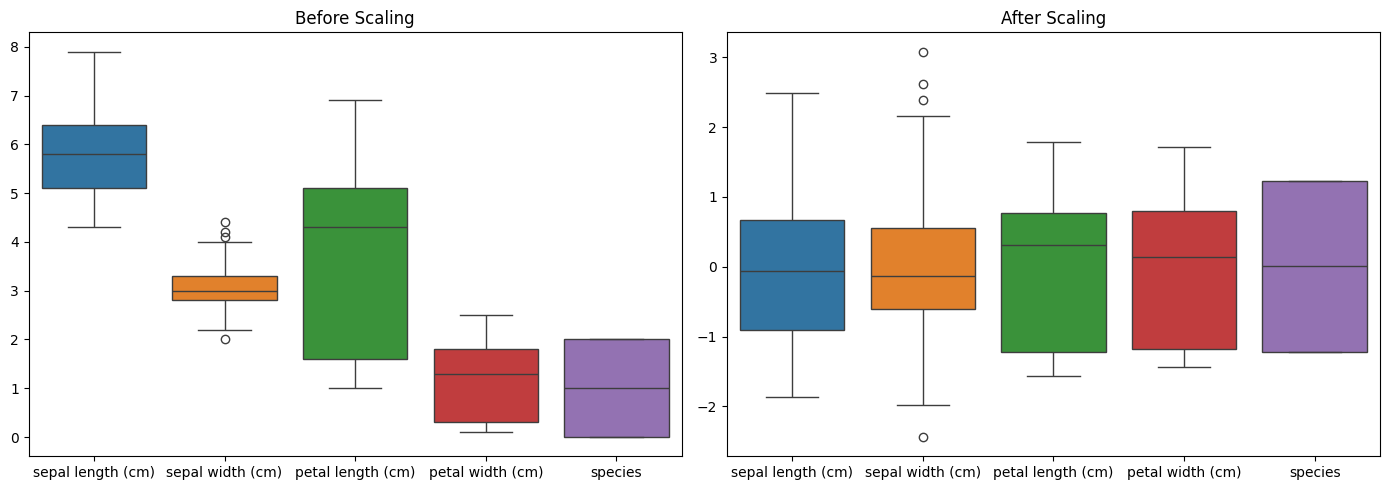

In [54]:
#to visualise the diffrence between scaled and unscaled data
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['float64', 'int64']).columns)
plt.figure(figsize=(14,5))

# Unscaled
plt.subplot(1,2,1)
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Before Scaling")

# Scaled
plt.subplot(1,2,2)
sns.boxplot(data=scaled_df)
plt.title("After Scaling")

plt.tight_layout()
plt.show()

# **Model Selection and Training**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {'Logistic Regression': LogisticRegression(),'SVM': SVC(),'Decision Tree': DecisionTreeClassifier(),'K-Nearest Neighbors': KNeighborsClassifier(),'Random Forest': RandomForestClassifier()}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled_df, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Logistic Regression Accuracy: 100.00%
SVM Accuracy: 100.00%
Decision Tree Accuracy: 100.00%
K-Nearest Neighbors Accuracy: 100.00%
Random Forest Accuracy: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Model Evaluation and Hyperparameter Tuning**

 KNN best params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

 KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



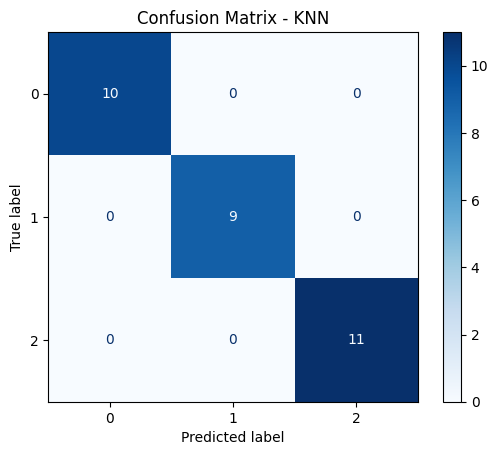

 SVM best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

 SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



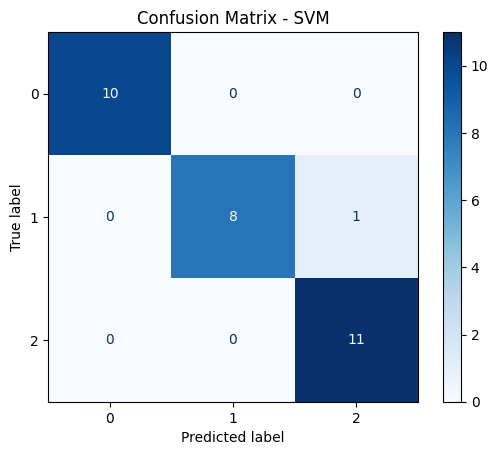

 Random Forest best params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}

 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



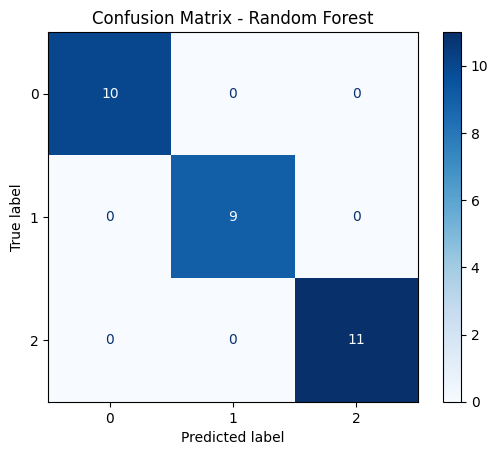

In [56]:
#hyperparameter tuning & evaluation

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define models with parameters
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors':[3,5,7,9], 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}),
    'SVM': (SVC(), {'C':[0.1,1,10], 'kernel':['linear','rbf','poly'], 'gamma':['scale','auto']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators':[50,100,200], 'max_depth':[None,10,20], 'criterion':['gini','entropy']})}
best_models = {}
# grid search and evaluation
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f" {name} best params: {grid.best_params_}")

    y_pred = grid.predict(X_test)
    print(f"\n {name} Classification Report:\n", classification_report(y_test, y_pred))

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()



# **Model Interpretation and Insights**

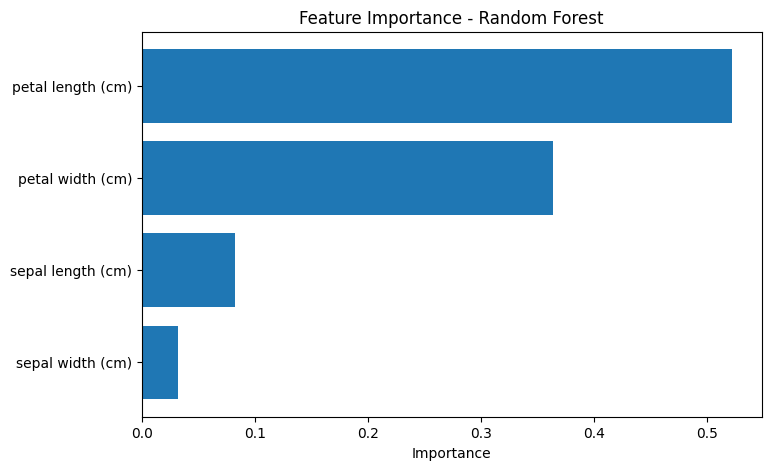

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
importances = best_models['Random Forest'].feature_importances_ # Get feature importance from the Random Forest model
features = X.columns # Match them with column names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8,5)) # Plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()
